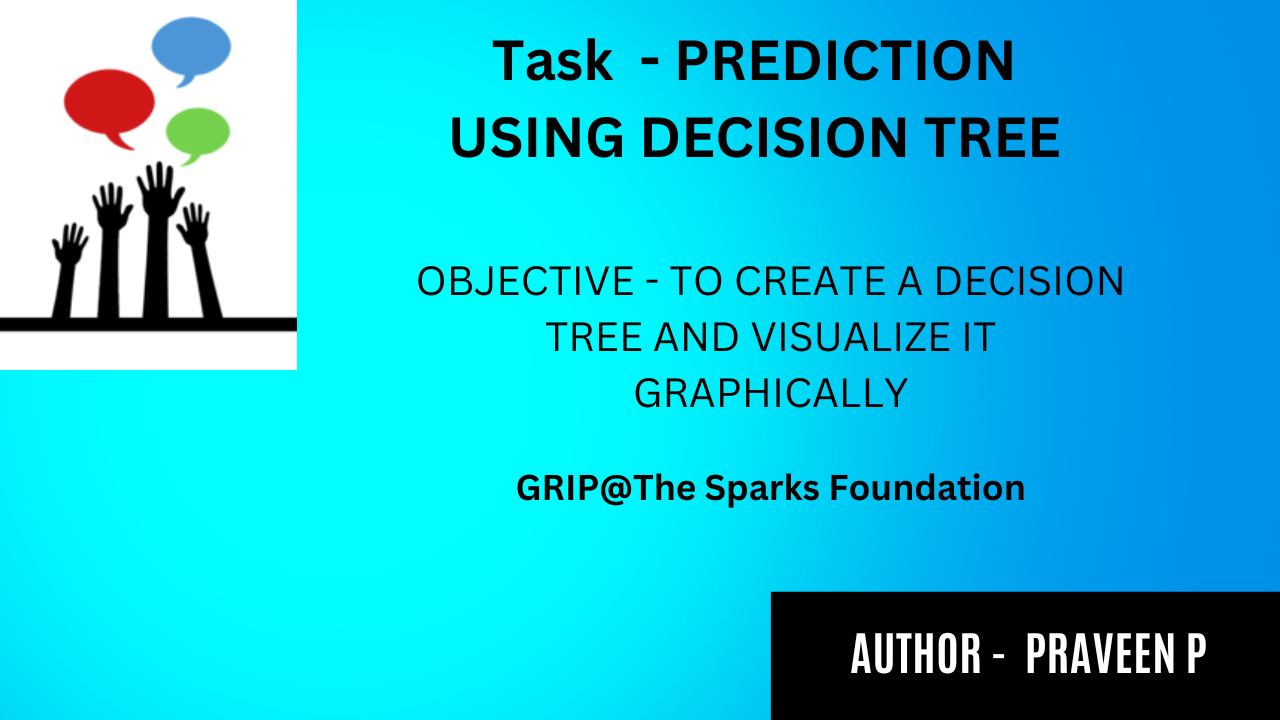

# Import libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# load the dataset

In [2]:
iris = pd.read_csv(r'\Users\TOH TICKETING\Downloads\iris.csv')

# exploring the data

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Prepare the data

In [6]:
X = iris.drop(columns=["Id", "Species"])
y = iris["Species"]

# Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

# Predict the classes for the test set

In [9]:
y_pred = clf.predict(X_test)


# Calculate the accuracy of the classifier

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1.0


# Visualize the decision tree graphically

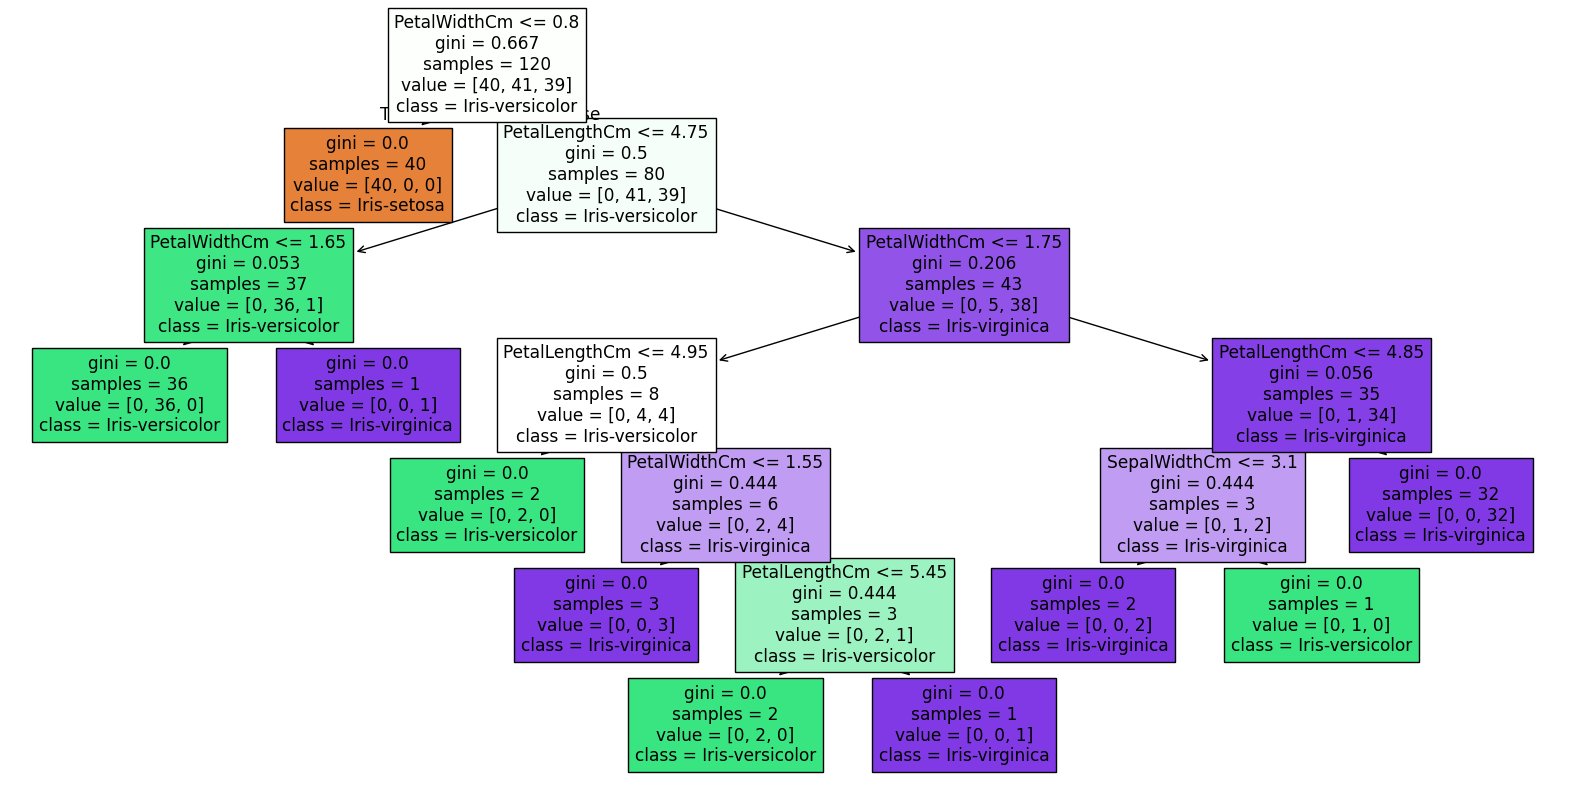

In [11]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=clf.classes_.tolist(), filled=True)
plt.show()

# Predict the class of a new sample

In [12]:
new_sample = [[5.1, 3.5, 1.4, 0.2]]
predicted_class = clf.predict(new_sample)
print(f"The predicted class for the new sample {new_sample} is {predicted_class[0]}")

The predicted class for the new sample [[5.1, 3.5, 1.4, 0.2]] is Iris-setosa


C:\programming.py\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
# Perform k-fold cross-validation with k=5
cv_scores = cross_val_score(clf, X, y, cv=5)


In [14]:
# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {mean_cv_score * 100:.2f}%")
print(f"Standard deviation of cross-validation scores: {std_cv_score * 100:.2f}%")

Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean cross-validation score: 96.67%
Standard deviation of cross-validation scores: 3.65%


# conclusion
### The decision tree classifier created using the provided Iris dataset demonstrated strong performance, achieving a mean accuracy of 96.00% with a standard deviation of 3.27% through k-fold cross-validation.

